## Downloading and Preprocessing the Dataset

In [1]:
!wget2 --no-clobber -q https://github.com/SoumadipDey/datasets/raw/main/mental_disorders_dataset.csv

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Loading the dataset into a pandas dataframe

In [3]:
df = pd.read_csv("mental_disorders_dataset.csv")
df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [4]:
df.isna().sum()

Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64

Seperate Features and Targets

In [5]:
feature_df = df.drop(["Expert Diagnose","Patient Number"], axis = 1)
target_df = df[["Expert Diagnose"]]

Convert non-numeric features to numeric type

In [6]:
from sklearn.preprocessing import LabelEncoder
for feature in feature_df.columns:
    feature_df[feature] = LabelEncoder().fit_transform(feature_df[feature])

feature_df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim
0,3,1,2,2,1,2,0,0,1,0,0,1,1,1,2,2,3
1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,3,1,4
2,2,0,2,2,1,0,0,0,1,1,0,1,1,0,5,4,6
3,3,1,3,0,1,1,1,0,1,0,0,0,0,0,2,1,1
4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,4,4,5


In [7]:
target_encoder = LabelEncoder()
target_df['Expert Diagnose'] = target_encoder.fit_transform(target_df['Expert Diagnose'])

## Splitting the Dataset into Training and Testing Sets

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df, target_df, 
                                                    test_size=0.3,
                                                    stratify=target_df,
                                                    random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(84, 17) (84, 1)
(36, 17) (36, 1)


## Making and Fitting the Decision Tree Classifier Model

In [9]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', max_depth=4, max_leaf_nodes= 10, random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,10
,min_impurity_decrease,0.0
,class_weight,None


In [10]:
y_pred = model.predict(X_test)

In [11]:
class_names = np.unique(target_encoder.inverse_transform(y_test))

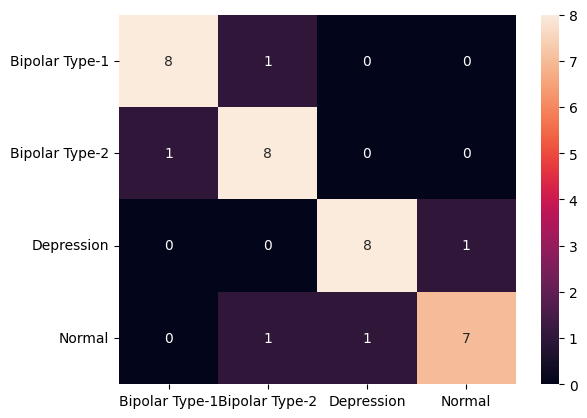

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(
    confusion_matrix(y_test, y_pred),
    xticklabels = class_names,
    yticklabels = class_names,
    annot=True
)
plt.show()

In [13]:
print(classification_report(y_test,y_pred,target_names=class_names))

                precision    recall  f1-score   support

Bipolar Type-1       0.89      0.89      0.89         9
Bipolar Type-2       0.80      0.89      0.84         9
    Depression       0.89      0.89      0.89         9
        Normal       0.88      0.78      0.82         9

      accuracy                           0.86        36
     macro avg       0.86      0.86      0.86        36
  weighted avg       0.86      0.86      0.86        36



Plotting the Decision Tree

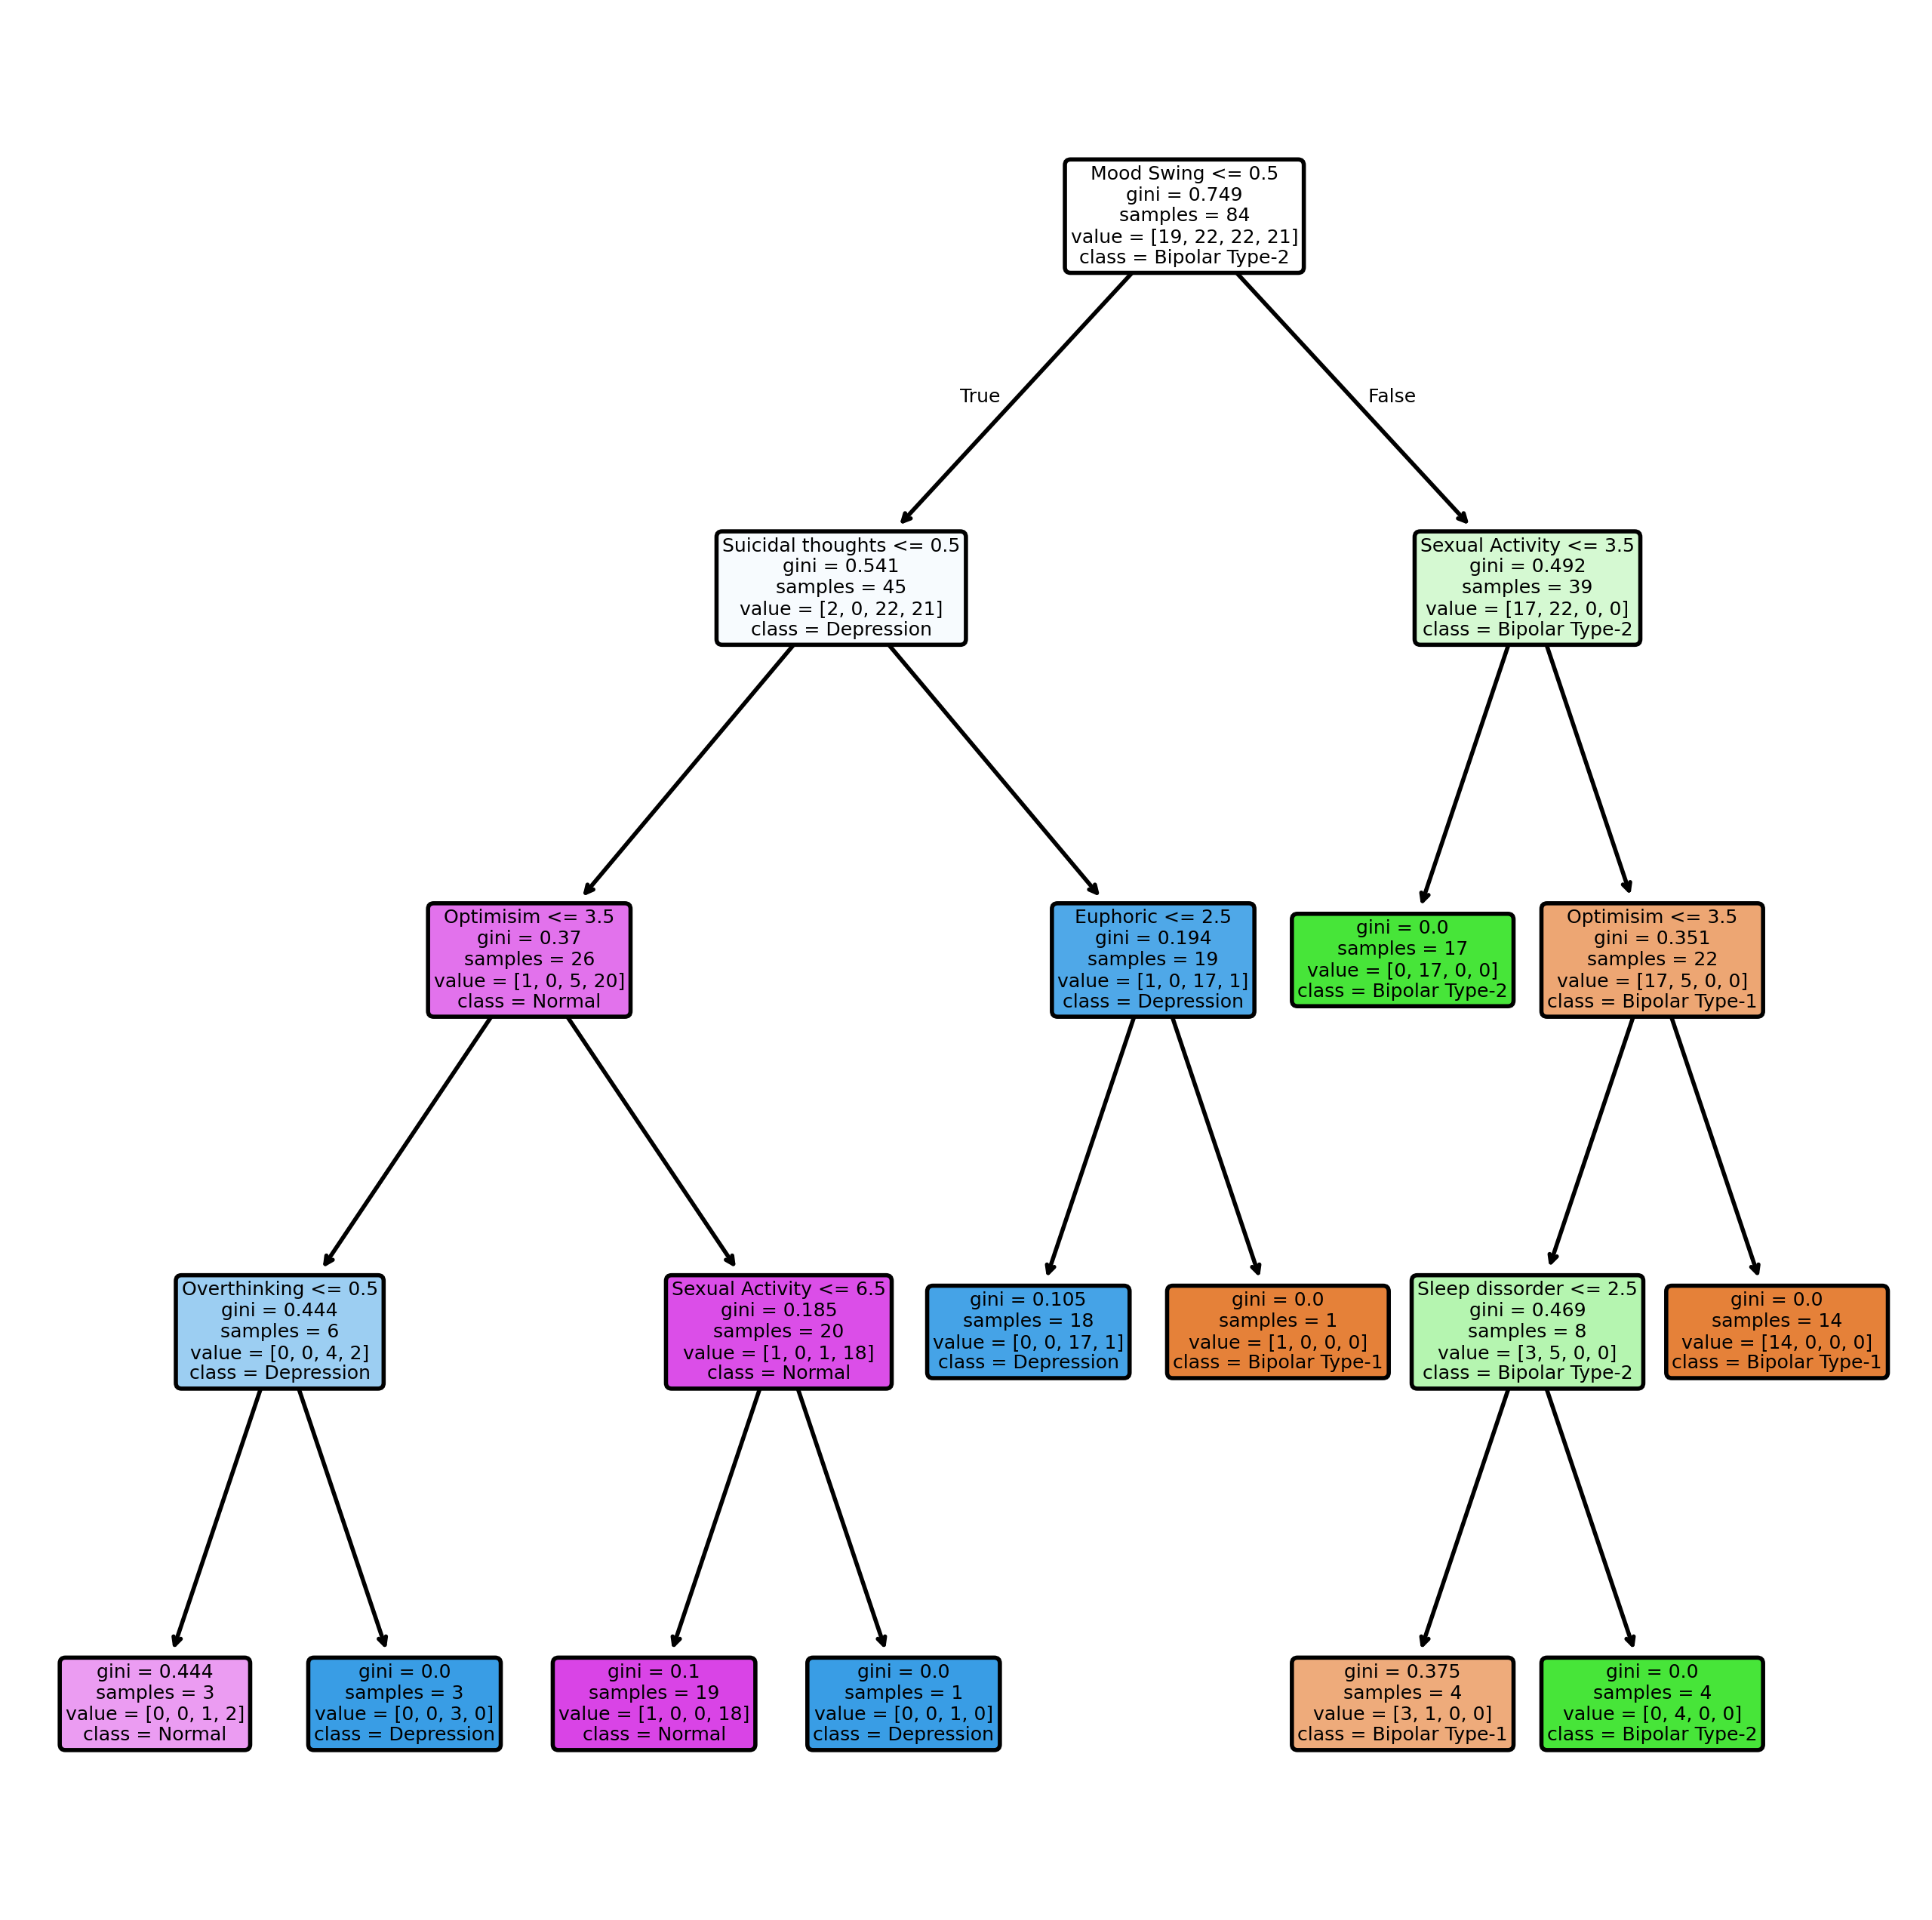

In [14]:
from sklearn.tree import plot_tree

plt.figure(1,(8,8), dpi=400)
tree = plot_tree(model, max_depth=None, feature_names=feature_df.columns, 
                 class_names=class_names, rounded=True, filled=True)
plt.savefig("Decision Tree Mental Disorders.png", dpi = 300)
plt.show()